In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

### Load dataframe

In [3]:
#---History table---
df_history = pd.read_csv('data/access_log.csv')
df_history.head(10)

,ACTION,TARGET_NAME,LOGIN,REQUEST_DATE,AUTHORIZATION_DATE
0,remove_access,11044,45813,2005-03-25 10:53:40,2005-03-25 10:53:41
1,add_access,11044,65766,2005-03-25 10:55:46,2005-03-25 10:55:47
2,add_access,9521,72531,2005-04-04 13:51:33,2005-04-06 10:21:48
3,add_access,9521,72531,2005-04-04 13:52:01,2005-04-06 10:21:48
4,add_access,9521,72531,2005-04-04 13:52:11,2005-04-06 10:21:49
5,add_access,10339,65338,2005-04-05 10:37:48,2005-04-05 10:37:49
6,add_access,9521,72531,2005-04-05 16:20:29,2005-04-05 16:20:31
7,remove_access,154,74430,2005-04-05 19:59:15,2005-04-05 19:59:15
8,remove_access,9669,59618,2005-04-06 08:40:03,2005-04-06 08:40:06
9,add_access,7315,77213,2005-03-25 14:15:20,2005-03-28 08:13:21


In [4]:
num_requesters = len(df_history['LOGIN'].unique())
num_requested_res = len(df_history['TARGET_NAME'].unique())

print('---Description---')
print('Num requesters:', num_requesters)
print('Num requested resources:', num_requested_res)
print('Num entries:', df_history.shape[0])
print()

df_pos_history = df_history[df_history['ACTION']=='add_access']
df_neg_history = df_history[df_history['ACTION']=='remove_access']
print('Num pos entries:', df_pos_history.shape[0])
print('Num neg entries:', df_neg_history.shape[0])

---Description---
Num requesters: 17612
Num requested resources: 6451
Num entries: 716063

Num pos entries: 705152
Num neg entries: 10911


In [7]:
#---User table---
df_users = pd.read_csv('data/az_uci_users.csv')
df_users = df_users[['PERSON_ID', 'PERSON_BUSINESS_TITLE', 'PERSON_BUSINESS_TITLE_DETAIL',
    'PERSON_COMPANY', 'PERSON_DEPTNAME', 'PERSON_JOB_CODE',
    'PERSON_JOB_FAMILY', 'PERSON_LOCATION', 'PERSON_MGR_ID', 'PERSON_ROLLUP_1',
    'PERSON_ROLLUP_2', 'PERSON_ROLLUP_3']]
df_users.head(5)

,PERSON_ID,PERSON_BUSINESS_TITLE,PERSON_BUSINESS_TITLE_DETAIL,PERSON_COMPANY,PERSON_DEPTNAME,PERSON_JOB_CODE,PERSON_JOB_FAMILY,PERSON_LOCATION,PERSON_MGR_ID,PERSON_ROLLUP_1,PERSON_ROLLUP_2,PERSON_ROLLUP_3
0,0,7,8,10,5,9,11,6,1,2,3,4
1,33263,33267,8,33269,33266,33268,33270,6,33264,2,33265,4
2,33271,33274,8,33276,33273,33275,11,6,33272,2,3,4
3,33277,33280,8,33269,33279,33268,33270,6,33278,2,33265,4
4,33281,33287,33288,33290,33286,33289,33291,6,33282,33283,33284,33285


In [8]:
#Watch out! Estos datos son sobre todos los usuarios, no los del log
total_users = df_users.shape[0]
attnames = list(df_users.columns)[1:]

print('---Description of users---')
print('Num users:', total_users)
print('Num of attvalues:')
for attname in attnames:
    print(attname, '-->', len(df_users[attname].unique()))
print()

---Description of users---
Num users: 36063
Num of attvalues:
PERSON_BUSINESS_TITLE --> 4979
PERSON_BUSINESS_TITLE_DETAIL --> 56
PERSON_COMPANY --> 49
PERSON_DEPTNAME --> 405
PERSON_JOB_CODE --> 13
PERSON_JOB_FAMILY --> 70
PERSON_LOCATION --> 1
PERSON_MGR_ID --> 3207
PERSON_ROLLUP_1 --> 12
PERSON_ROLLUP_2 --> 111
PERSON_ROLLUP_3 --> 12



### Attribute analysis

In [9]:
attname = 'PERSON_BUSINESS_TITLE'
col_list = df_users[attname].tolist()
attval_to_freq1 = dict(Counter(col_list))

attname = 'PERSON_COMPANY'
col_list = df_users[attname].tolist()
attval_to_freq2 = dict(Counter(col_list))

attname = 'PERSON_DEPTNAME'
col_list = df_users[attname].tolist()
attval_to_freq3 = dict(Counter(col_list))

attname = 'PERSON_JOB_CODE'
col_list = df_users[attname].tolist()
attval_to_freq4 = dict(Counter(col_list))

attname = 'PERSON_JOB_FAMILY'
col_list = df_users[attname].tolist()
attval_to_freq5 = dict(Counter(col_list))

attname = 'PERSON_ROLLUP_1'
col_list = df_users[attname].tolist()
attval_to_freq6 = dict(Counter(col_list))

attname = 'PERSON_ROLLUP_2'
col_list = df_users[attname].tolist()
attval_to_freq7 = dict(Counter(col_list))


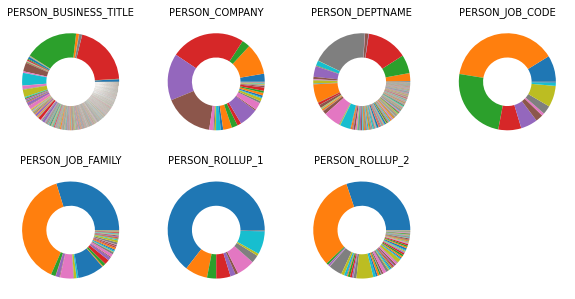

In [22]:
fig, axes = plt.subplots(2, 4)

fig.set_figheight(10)
fig.set_figwidth(10)

attname = 'PERSON_BUSINESS_TITLE'
axes[0,0].pie(attval_to_freq1.values(),wedgeprops=dict(width=.5))
axes[0,0].set_title(attname,fontsize=10)

attname = 'PERSON_COMPANY'
axes[0,1].pie(attval_to_freq2.values(),wedgeprops=dict(width=.5))
axes[0,1].set_title(attname,fontsize=10)

attname = 'PERSON_DEPTNAME'
axes[0,2].pie(attval_to_freq3.values(),wedgeprops=dict(width=.5))
axes[0,2].set_title(attname,fontsize=10)

attname = 'PERSON_JOB_CODE'
axes[0,3].pie(attval_to_freq4.values(),wedgeprops=dict(width=.5))
axes[0,3].set_title(attname,fontsize=10)

attname = 'PERSON_JOB_FAMILY'
axes[1,0].pie(attval_to_freq5.values(),wedgeprops=dict(width=.5))
axes[1,0].set_title(attname,fontsize=10)

attname = 'PERSON_ROLLUP_1'
axes[1,1].pie(attval_to_freq6.values(),wedgeprops=dict(width=.5))
axes[1,1].set_title(attname,fontsize=10)

attname = 'PERSON_ROLLUP_2'
axes[1,2].pie(attval_to_freq7.values(),wedgeprops=dict(width=.5))
axes[1,2].set_title(attname,fontsize=10)

#How can I make a blank subplot in matplotlib?
#https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib
axes[1,3].axis('off')

#Use this commands to eliminate the spacing between rows
fig.set_figheight(5)
fig.set_figwidth(10)

plt.show()


In [23]:
fig.savefig("figures/ch4_azuci_atts.pdf", format="pdf", bbox_inches="tight")

### Check contradictions in entries

In [24]:
#Piece of code copied from acgraph.py
dfgb_pos = df_pos_history.groupby(['LOGIN','TARGET_NAME'])
df_temp_pos = dfgb_pos.size().to_frame(name = 'COUNT').reset_index()
usrid_to_resid_pos = df_temp_pos[['LOGIN','TARGET_NAME']].values.tolist()

dfgb_neg = df_neg_history.groupby(['LOGIN','TARGET_NAME'])
df_temp_neg = dfgb_neg.size().to_frame(name = 'COUNT').reset_index()
usrid_to_resid_neg = df_temp_neg[['LOGIN','TARGET_NAME']].values.tolist()

In [25]:
#Change format to set of tuples
usrid_to_resid_pos_set = [(l[0],l[1]) for l in usrid_to_resid_pos]
usrid_to_resid_pos_set = set(usrid_to_resid_pos_set)
print('AZUCI has', len(usrid_to_resid_pos_set), 'pos u-r pairs')

usrid_to_resid_neg_set = [(l[0],l[1]) for l in usrid_to_resid_neg]
usrid_to_resid_neg_set = set(usrid_to_resid_neg_set)
print('AZUCI has', len(usrid_to_resid_neg_set), 'neg u-r pairs')

AZUCI has 144435 pos u-r pairs
AZUCI has 9818 neg u-r pairs


In [26]:
count = 0
for tup in list(usrid_to_resid_pos_set):
    if tup in usrid_to_resid_neg_set:
        count += 1
        
print('AZUCI has', count, 'contradictions')

AZUCI has 9666 contradictions


In [9]:
#Conclusiones:
#9666 de los 9818 neg u-r pairs contradicen a solicitudes positivas.
#Por lo tanto, las entradas negativas tendran que ser analizadas en su contexto, en el
#tiempo de la red en que fueron registradas.